## Import Data ##

In [877]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import *
import warnings
import os

warnings.filterwarnings("ignore", category=DeprecationWarning)

device = "mps" if torch.mps.is_available() else "cpu"
print(device)

mps


In [879]:
df = pd.read_csv("riceClassification.csv")
df = df.drop(columns=["id"])
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Words to numbers
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [881]:
#Standardize data, helpful for linear regression and Neural Networks

copy_df = df.copy()

for column in copy_df.columns:
    copy_df[column] = copy_df[column]/copy_df[column].abs().max()
copy_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0
...,...,...,...,...,...,...,...,...,...,...,...
18180,0.573262,0.811219,0.618156,0.971489,0.545785,0.757140,0.562384,0.654774,0.733291,0.744543,0.0
18181,0.742899,0.925674,0.704314,0.971683,0.709121,0.861916,0.730296,0.758107,0.708884,0.745661,0.0
18182,0.623408,0.844800,0.640916,0.972058,0.593296,0.789562,0.633098,0.673049,0.754720,0.747830,0.0
18183,0.583741,0.826356,0.623551,0.972748,0.562227,0.764030,0.555396,0.675248,0.702103,0.751874,0.0


In [883]:
def drop():
    global X
    global y
    
    X = copy_df.drop(columns=["Class"])
    y = copy_df["Class"]

drop()
copy_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0
...,...,...,...,...,...,...,...,...,...,...,...
18180,0.573262,0.811219,0.618156,0.971489,0.545785,0.757140,0.562384,0.654774,0.733291,0.744543,0.0
18181,0.742899,0.925674,0.704314,0.971683,0.709121,0.861916,0.730296,0.758107,0.708884,0.745661,0.0
18182,0.623408,0.844800,0.640916,0.972058,0.593296,0.789562,0.633098,0.673049,0.754720,0.747830,0.0
18183,0.583741,0.826356,0.623551,0.972748,0.562227,0.764030,0.555396,0.675248,0.702103,0.751874,0.0


## Data Clean Up ##

In [599]:
stats.zscore(copy_df) #Find outliers

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,-1.703630,-4.803744,0.417927,-6.393938,-1.696989,-1.830049,0.391654,-2.661778,0.839588,-2.663800,0.906218
1,-2.838478,-6.220789,-0.835611,-6.209583,-2.803539,-3.398143,0.923070,-4.857318,1.837215,-2.635418,0.906218
2,-2.718519,-6.091404,-0.771700,-6.024520,-2.725641,-3.213879,1.365122,-4.799860,2.383587,-2.605950,0.906218
3,-2.701479,-6.031573,-0.783130,-5.781578,-2.708996,-3.188141,1.598635,-4.777995,2.409877,-2.565690,0.906218
4,-2.278893,-5.377799,-0.341288,-5.433479,-2.279559,-2.580390,1.463045,-4.111042,2.477331,-2.504645,0.906218
...,...,...,...,...,...,...,...,...,...,...,...
18180,-0.806657,-0.246943,-0.872502,0.778548,-0.810816,-0.788051,-1.130973,-0.632104,-0.661944,0.720875,-1.103487
18181,0.373857,1.447410,-0.165603,0.784700,0.386282,0.417903,0.295131,1.149128,-0.990018,0.730936,-1.103487
18182,-0.457683,0.250187,-0.685768,0.796550,-0.462606,-0.414880,-0.530388,-0.317085,-0.373899,0.750451,-1.103487
18183,-0.733727,-0.022853,-0.828242,0.818359,-0.690307,-0.708755,-1.190322,-0.279187,-1.081165,0.786835,-1.103487


In [885]:
#Drop outliers
z = np.abs(stats.zscore(copy_df))
threshold_z = 3
outliers = np.where(z > threshold_z)[0]
copy_df = copy_df.drop(outliers)
copy_df = copy_df.reset_index(drop=True)
copy_df.shape

(17776, 11)

In [603]:
copy_df.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [ ]:
copy_df = copy_df.dropna() #drop rows with missing values
copy_df = copy_df.reset_index(drop=True)

In [605]:
copy_df.duplicated().sum()

0

In [ ]:
copy_df = copy_df.drop_duplicates() #drop duplicate rows
copy_df = copy_df.reset_index(drop=True)

In [887]:
drop()
copy_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.566503,0.666941,0.748069,0.892550,0.537518,0.752664,0.848595,0.593861,0.880926,0.505820,1.0
1,0.535945,0.648554,0.724537,0.893771,0.513172,0.732083,0.684570,0.581329,0.869729,0.507851,1.0
2,0.516454,0.639974,0.707165,0.897050,0.487555,0.718648,0.643682,0.563947,0.890560,0.513442,1.0
3,0.485309,0.627375,0.688148,0.899213,0.471021,0.696641,0.668373,0.570314,0.818270,0.517244,1.0
4,0.489324,0.631807,0.691446,0.899867,0.469658,0.699517,0.667992,0.568411,0.830576,0.518413,1.0
...,...,...,...,...,...,...,...,...,...,...,...
17771,0.573262,0.811219,0.618156,0.971489,0.545785,0.757140,0.562384,0.654774,0.733291,0.744543,0.0
17772,0.742899,0.925674,0.704314,0.971683,0.709121,0.861916,0.730296,0.758107,0.708884,0.745661,0.0
17773,0.623408,0.844800,0.640916,0.972058,0.593296,0.789562,0.633098,0.673049,0.754720,0.747830,0.0
17774,0.583741,0.826356,0.623551,0.972748,0.562227,0.764030,0.555396,0.675248,0.702103,0.751874,0.0


## Statistical Modeling ##

In [609]:
copy_df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000
mean,0.694299,0.833283,0.725319,0.948621,0.661225,0.829035,0.694623,0.694758,0.780819,0.668103,0.545286
std,0.139851,0.056721,0.121411,0.028168,0.132815,0.083671,0.117764,0.052300,0.072318,0.108468,0.497959
min,0.325269,0.625727,0.421747,0.852010,0.314408,0.570324,0.432270,0.518630,0.573700,0.450834,0.000000
25%,0.587071,0.798607,0.622905,0.923021,0.559593,0.766206,0.605562,0.659252,0.718866,0.566389,0.000000
50%,0.655142,0.841562,0.676432,0.956879,0.624273,0.809408,0.677154,0.695985,0.771687,0.673146,1.000000
75%,0.827914,0.874544,0.849991,0.973927,0.788427,0.909898,0.783494,0.734265,0.849055,0.758951,1.000000
max,1.000000,1.000000,1.000000,0.999668,0.968296,1.000000,0.999508,0.862268,0.944419,0.995285,1.000000


In [611]:
copy_df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,0.573622,0.949080,-0.730448,0.999421,0.998743,0.253899,0.893692,0.708051,-0.720945,-0.828559
MajorAxisLength,0.573622,1.000000,0.293407,0.119385,0.576221,0.581950,-0.049414,0.853015,-0.124197,0.141810,-0.135604
MinorAxisLength,0.949080,0.293407,1.000000,-0.906116,0.947814,0.947370,0.314367,0.724718,0.873446,-0.898038,-0.918278
Eccentricity,-0.730448,0.119385,-0.906116,1.000000,-0.727901,-0.727310,-0.343199,-0.387047,-0.950461,0.977416,0.895405
ConvexArea,0.999421,0.576221,0.947814,-0.727901,1.000000,0.998060,0.250963,0.898171,0.699274,-0.718357,-0.825989
EquivDiameter,0.998743,0.581950,0.947370,-0.727310,0.998060,1.000000,0.252834,0.898571,0.704989,-0.718138,-0.825601
Extent,0.253899,-0.049414,0.314367,-0.343199,0.250963,0.252834,1.000000,0.112803,0.363884,-0.347883,-0.310407
Perimeter,0.893692,0.853015,0.724718,-0.387047,0.898171,0.898571,0.112803,1.000000,0.323642,-0.367022,-0.562460
Roundness,0.708051,-0.124197,0.873446,-0.950461,0.699274,0.704989,0.363884,0.323642,1.000000,-0.959075,-0.874710
AspectRation,-0.720945,0.141810,-0.898038,0.977416,-0.718357,-0.718138,-0.347883,-0.367022,-0.959075,1.000000,0.872977


In [613]:
kstest(X, "norm").pvalue #p-value for each row
#kstest(df[""], "norm").pvalue #p-value for each column

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

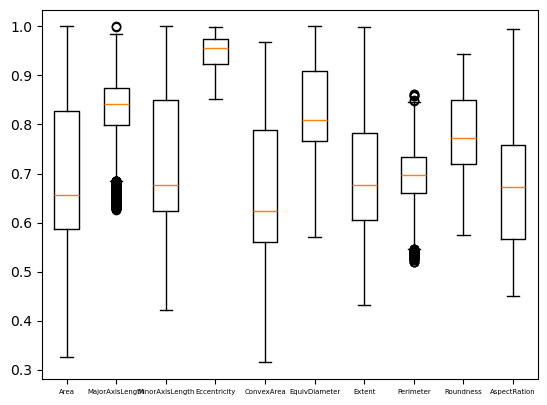

In [615]:
import matplotlib.pyplot as plt
import seaborn as sn

#When dealing with very large data-sets/working with others using graphs to see things would be beneficial to everyone's sanity
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X.columns, size=5)
plt.show()

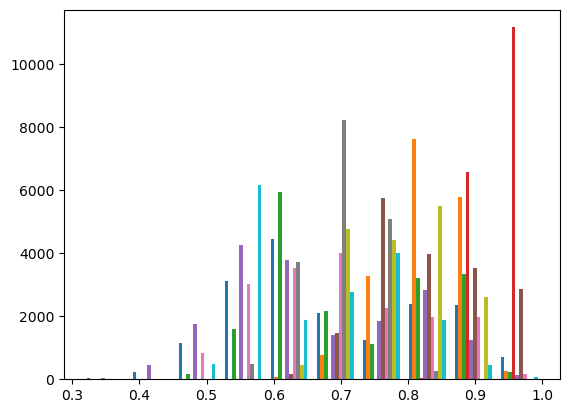

In [617]:
plt.hist(X)
plt.show()

## Training Model ##

In [889]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [891]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [893]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(12443, 10)
(2667, 10)
(2666, 10)


In [895]:
class dataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(np.array(X), dtype = torch.float32).to(device)
        self.y = torch.tensor(np.array(y), dtype = torch.float32).to(device)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [897]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [899]:
train_dataloader = DataLoader(training_data, batch_size = 37, shuffle = True)
validation_dataloader = DataLoader(validation_data, batch_size = 37, shuffle = True)
testing_dataloader = DataLoader(testing_data, batch_size = 37, shuffle = True)

In [901]:
Hidden_Neurons = 25

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.input_layer = nn.Linear(X.shape[1], Hidden_Neurons)
        self.linear = nn.Linear(Hidden_Neurons, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        #Forward Propagation
        x = x.to(device)
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

model = MyModel().to(device)

In [903]:
summary(model, (X.shape[1],), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
MyModel                                  [1]                       --
├─Linear: 1-1                            [25]                      275
├─Linear: 1-2                            [1]                       26
├─Sigmoid: 1-3                           [1]                       --
Total params: 301
Trainable params: 301
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [905]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [907]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10

for epoch in range(epochs):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0

    for data in train_dataloader:
        inputs, labels = data

        prediction = model(inputs).squeeze(1)

        batch_loss = criterion(prediction, labels)
        
        total_loss_train += batch_loss.item()

        acc = ((prediction).round() == labels).sum().item()

        total_acc_train += acc

        #Back Propagation
        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)

            batch_loss = criterion(prediction, labels)
        
            total_loss_val += batch_loss.item()

            acc = ((prediction).round() == labels).sum().item()

            total_acc_val += acc
        
    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_validation_plot.append(round(total_loss_val/1000, 4))
    
    total_acc_train_plot.append(round(total_acc_train/training_data.__len__()*100, 4))
    total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__()*100, 4))

    print(f'''Epoch no. {epoch+1} 
    Training Loss: {round(total_loss_train/1000, 4)} 
    Training Accuracy: {round(total_acc_train/training_data.__len__()*100, 4)} 
    Validation Loss: {round(total_loss_val/1000, 4)} 
    Validation Accuracy: {round(total_acc_val/validation_data.__len__()*100, 4)}''')

    print("="*50)

Epoch no. 1 
    Training Loss: 0.1882 
    Training Accuracy: 84.1839 
    Validation Loss: 0.0262 
    Validation Accuracy: 98.9876
Epoch no. 2 
    Training Loss: 0.0757 
    Training Accuracy: 98.256 
    Validation Loss: 0.0099 
    Validation Accuracy: 98.8376
Epoch no. 3 
    Training Loss: 0.0358 
    Training Accuracy: 98.5132 
    Validation Loss: 0.0056 
    Validation Accuracy: 98.9876
Epoch no. 4 
    Training Loss: 0.024 
    Training Accuracy: 98.6016 
    Validation Loss: 0.0043 
    Validation Accuracy: 99.1001
Epoch no. 5 
    Training Loss: 0.0191 
    Training Accuracy: 98.7141 
    Validation Loss: 0.0034 
    Validation Accuracy: 98.9876
Epoch no. 6 
    Training Loss: 0.0168 
    Training Accuracy: 98.7061 
    Validation Loss: 0.003 
    Validation Accuracy: 99.1751
Epoch no. 7 
    Training Loss: 0.0153 
    Training Accuracy: 98.7865 
    Validation Loss: 0.0026 
    Validation Accuracy: 99.1376
Epoch no. 8 
    Training Loss: 0.0144 
    Training Accuracy: 98

## Post-Training Analysis ##

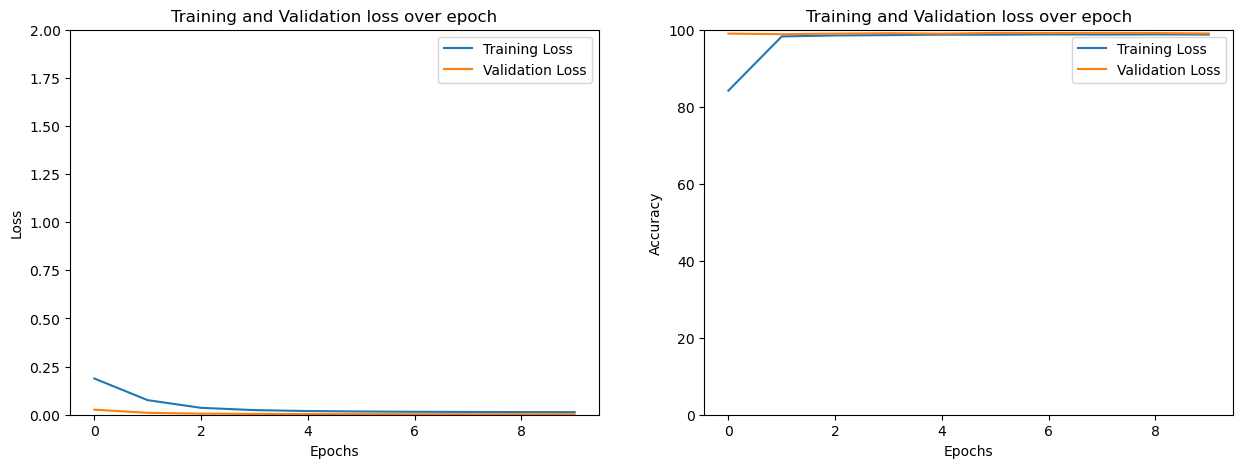

In [911]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axs[0].plot(total_loss_train_plot, label = "Training Loss")
axs[0].plot(total_loss_validation_plot, label = "Validation Loss")
axs[0].set_title("Training and Validation loss over epoch")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label = "Training Loss")
axs[1].plot(total_acc_validation_plot, label = "Validation Loss")
axs[1].set_title("Training and Validation loss over epoch")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([0,100])
axs[1].legend()

plt.show()

In [948]:
Area = 3737/df["Area"].abs().max()
MajorAxisLength = 38/df["MajorAxisLength"].abs().max()
MinorAxisLength = 28/df["MinorAxisLength"].abs().max()
Eccentricity = 49/df["Eccentricity"].abs().max()
ConvexArea = 373217/df["ConvexArea"].abs().max()
EquivDiameter = 8/df["EquivDiameter"].abs().max()
Extent = 248/df["Extent"].abs().max()
Perimeter = 419/df["Perimeter"].abs().max()
Roundness = 338/df["Roundness"].abs().max()
AspectRation = 229/df["AspectRation"].abs().max()
Class = 29/df["Class"].abs().max()

myprediction = model(torch.tensor([Area, MajorAxisLength, MinorAxisLength, Eccentricity, 
              ConvexArea, EquivDiameter, Extent, Perimeter, Roundness,
              AspectRation], dtype = torch.float32).to(device))
round(myprediction.item())

0